In [1]:
import cartopy.crs as ccrs
from cartopy import feature
import matplotlib.pyplot as plt
from matplotlib import cm
from function_read import *

## Read the data

In [2]:
# read the file
f = open("norm.nao.monthly.b5001.current.ascii", "r")
#data = f.read()
#create a list to store the NAO
NAO = []
#create a list to store the NAO
dates = []
# read the file line by line
for line in f:
    #separate the different columns
    aux = line.split()
    #store the dates
    dates.append(datetime(year = int(aux[0]), month = int(aux[1]), day = 1))
    #store the NAO
    NAO.append(float(aux[2]))
f.close()   

 
#Convert in numpy array
NAO = np.array(NAO)
dates = np.array(dates)

In [3]:
#find the date of the maximum NAO
dateNAOmax = dates[np.argmax(NAO)]
#find the date of the minimum NAO
dateNAOmin = dates[np.argmin(NAO)]

In [4]:
# read the geopotencial
filename = "https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.mean.nc"

lon_bnds = [-90, 90]
lat_bnds = [20, 90]
geo500, datesgeo, lon, lat = readregion3D(filename, "hgt", lon_bnds, lat_bnds, 500)

In [5]:
# find the month corresponding to the strongest NAO+
geo500NAOmax = geo500[np.argmin(abs(datesgeo - dateNAOmax)),:,:]
geo500NAOmin = geo500[np.argmin(abs(datesgeo - dateNAOmax)),:,:]
geo500NAOmax.shape

(27, 73)

## Cartopy

Hemos visto ya como hacer un polt basico

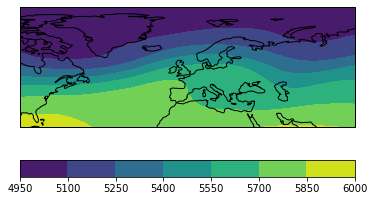

In [6]:
data_crs = ccrs.PlateCarree()
#define a map
ax = plt.axes(projection=data_crs)
#drw coastline
ax.coastlines()
#put longitude from -180 to 180
lon[lon>180]=lon[lon>180]-360
# create 2d lon lat
lon2d, lat2d = np.meshgrid(lon, lat)
#plot
cs = ax.contourf(lon2d, lat2d, geo500NAOmax)
# drw color bar
cbar = plt.colorbar(cs, orientation="horizontal")

A very nice webpage to choose your color bar: http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

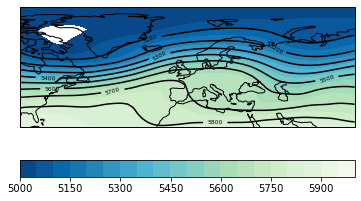

In [18]:
data_crs = ccrs.PlateCarree()
#define a map
ax = plt.axes(projection=data_crs)
#drw coastline
ax.coastlines()
# create 2d lon lat
lon2d, lat2d = np.meshgrid(lon, lat)
# change color bar
cs = ax.contourf(lon2d, lat2d, geo500NAOmax, np.arange(5000,6050, step=50), cmap=plt.cm.GnBu_r)
# add contour (it can be the same field or another one)
cs2 = ax.contour(lon2d, lat2d, geo500NAOmax, levels = np.arange(5100,6000,100), colors="black")
#add contour label
ax.clabel(cs2,inline=1,fontsize=6,fmt='%3.0f')
# 
cbar = plt.colorbar(cs, orientation="horizontal")

Dejar saturar salir del los limites del color bar 

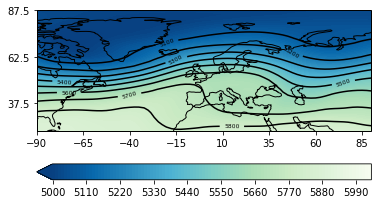

In [23]:
data_crs = ccrs.PlateCarree()
#define a map
ax = plt.axes(projection=data_crs)
#drw coastline
ax.coastlines()
# create 2d lon lat
lon2d, lat2d = np.meshgrid(lon, lat)
# change color bar
cs = ax.contourf(lon2d, lat2d, geo500NAOmax, 
                 np.arange(5000,6050, step=10), 
                 cmap=plt.cm.GnBu_r, extend="min")
# add contour (it can be the same field or another one)
cs2 = ax.contour(lon2d, lat2d, geo500NAOmax, 
                 levels = np.arange(5100,6000,100), colors="black")
#add contour label
ax.clabel(cs2,inline=1,fontsize=6,fmt='%3.0f')
ax.set_yticks(lat[::10])
ax.set_xticks(lon[::10])
# 
cbar = plt.colorbar(cs, orientation="horizontal")

Change projection:

https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html

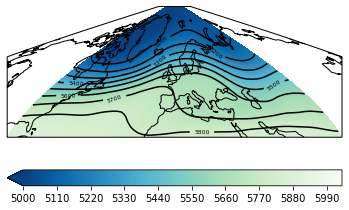

In [25]:
%matplotlib inline
data_crs = ccrs.Sinusoidal()
#define a map
ax = plt.axes(projection=data_crs)
#drw coastline
ax.coastlines()
# create 2d lon lat
lon2d, lat2d = np.meshgrid(lon, lat)
# change color bar
cs = ax.contourf(lon2d, lat2d, geo500NAOmax, np.arange(5000,6050, step=10), 
                 transform=ccrs.PlateCarree(), 
                 cmap=plt.cm.GnBu_r, extend="min")
cs2 = ax.contour(lon2d, lat2d, geo500NAOmax, levels = np.arange(5100,6000,100), 
                 transform=ccrs.PlateCarree(), colors="black")
#add contour label
ax.clabel(cs2,inline=1,fontsize=6,fmt='%3.0f')
# 
cbar = plt.colorbar(cs, orientation="horizontal")


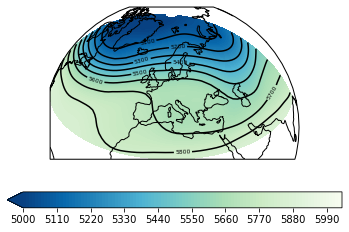

In [26]:
%matplotlib inline
data_crs = ccrs.NearsidePerspective(central_longitude=10.0, central_latitude=35.0, satellite_height=3.87e7)
#define a map
ax = plt.axes(projection=data_crs)
#drw coastline
ax.coastlines()
# create 2d lon lat
lon2d, lat2d = np.meshgrid(lon, lat)
# change color bar
cs = ax.contourf(lon2d, lat2d, geo500NAOmax, np.arange(5000,6050, step=10), transform=ccrs.PlateCarree(), 
                 cmap=plt.cm.GnBu_r, extend="min")
cs2 = ax.contour(lon2d, lat2d, geo500NAOmax, levels = np.arange(5100,6000,100), 
                 transform=ccrs.PlateCarree(), colors="black")
#add contour label
ax.clabel(cs2,inline=1,fontsize=6,fmt='%3.0f')
# 
cbar = plt.colorbar(cs, orientation="horizontal")


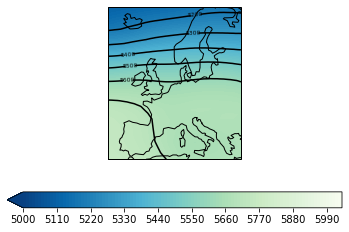

In [27]:
%matplotlib inline
data_crs = ccrs.EuroPP()
#define a map
ax = plt.axes(projection=data_crs)
#drw coastline
ax.coastlines()
# create 2d lon lat
lon2d, lat2d = np.meshgrid(lon, lat)
# change color bar
cs = ax.contourf(lon2d, lat2d, geo500NAOmax, np.arange(5000,6050, step=10), transform=ccrs.PlateCarree(), 
                 cmap=plt.cm.GnBu_r, extend="min")
cs2 = ax.contour(lon2d, lat2d, geo500NAOmax, levels = np.arange(5100,6000,100), 
                 transform=ccrs.PlateCarree(), colors="black")
#add contour label
ax.clabel(cs2,inline=1,fontsize=6,fmt='%3.0f')
# 
cbar = plt.colorbar(cs, orientation="horizontal")


Change limit of the plot

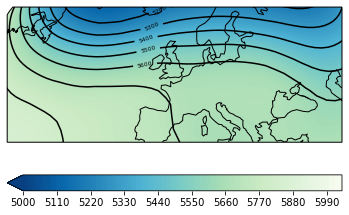

In [28]:
%matplotlib inline
data_crs = ccrs.NearsidePerspective(central_longitude=10.0, central_latitude=35.0, satellite_height=3.85e7)
#define a map
ax = plt.axes(projection=data_crs)
#drw coastline
ax.coastlines()
# create 2d lon lat
lon2d, lat2d = np.meshgrid(lon, lat)
#set the limits
ax.set_extent((lon[10],lon[-18], lat[14], lat[-7]), crs=ccrs.PlateCarree())
# change color bar
cs = ax.contourf(lon2d, lat2d, geo500NAOmax, np.arange(5000,6050, step=10), transform=ccrs.PlateCarree(), 
                 cmap=plt.cm.GnBu_r, extend="min")

cs2 = ax.contour(lon2d, lat2d, geo500NAOmax, levels = np.arange(5100,6000,100), 
                 transform=ccrs.PlateCarree(), colors="black")
#add contour label
ax.clabel(cs2,inline=1,fontsize=6,fmt='%3.0f')
# 
cbar = plt.colorbar(cs, orientation="horizontal")


In [30]:
from matplotlib import path as mpath
bound = mpath.Path(np.array([[lon[0],lon[0],lon[-1], lon[-1], lon[0]], [lat[0], lat[-1], lat[-1], lat[0], lat[0]]]).T)

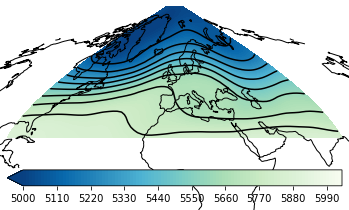

In [34]:
%matplotlib inline
data_crs = ccrs.Sinusoidal()
#define a map
ax = plt.axes(projection=data_crs)
#set the limits
ax.set_boundary(bound, transform=ccrs.PlateCarree(), use_as_clip_path=True)
#drw coastline
ax.coastlines()
# create 2d lon lat
lon2d, lat2d = np.meshgrid(lon, lat)

# change color bar
cs = ax.contourf(lon2d, lat2d, geo500NAOmax, np.arange(5000,6050, step=10), transform=ccrs.PlateCarree(), 
                 cmap=plt.cm.GnBu_r, extend="min", set_boundary=bound)

cs2 = ax.contour(lon2d, lat2d, geo500NAOmax, levels = np.arange(5100,6000,100), 
                 transform=ccrs.PlateCarree(), colors="black")
#add contour label
#ax.clabel(cs2,inline=1,fontsize=6,fmt='%3.0f')
# 
cbar = plt.colorbar(cs, orientation="horizontal")

#### Ejercicio: Plot the geopotential map for the minimum NAO, and realize the same maps for anomalies. 

####  Plot the maps of the anomalies  for temperature, precipitation and geo500 during max and min NAO in a multi panel.